In [15]:
import csv
import pandas as pd
import numpy as np
import json
#with open("relacion_circunscripcion_colegio_sde.csv", "r", encoding="utf-8") as f:
#    data = csv.DictReader(f)




In [16]:

def reformat_colums(colegio):
     jsondata = pd.read_json(f"data/sde/colegio_{colegio}.json", dtype={"letra": str})
     #print(jsondata["votosPreferenciales"][0])
     #print(jsondata.info())
     num_colums = len(jsondata["votosPreferenciales"][0])
     votos = pd.DataFrame(list(jsondata["votosPreferenciales"]))
     votos.columns = ["Casilla_{}".format(x) for x in range(1,num_colums +1)]
     new_votos = votos.map(lambda x: x["votos"])
     new_cat = pd.concat([jsondata,new_votos], axis=1)
     #print(new_cat.head())
     #print(jsondata.head())
     #print(new_cat["Casilla_4"].loc[2],"----", jsondata["votosPreferenciales"].loc[2])
     return new_cat

#reformat_colums("2340")


In [17]:
with open("data/sde/colegios.json")as f:
    colegios_json = json.load(f)

colegios = pd.DataFrame(colegios_json["items"])
colegios.head()

,id,letra,municipioId,tieneResultados,count
0,11909,0001,223,True,0
1,11910,0867,223,True,0
2,11911,0867A,223,True,0
3,11912,0868,223,True,0
4,11913,0868A,223,True,0


In [18]:

data_gen = (reformat_colums(colegio) for colegio in colegios["letra"])
results = pd.concat(data_gen, ignore_index=True, )
#new_data = new_data.fillna(-1)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50082 entries, 0 to 50081
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50082 non-null  int64  
 1   letra                50082 non-null  object 
 2   descripcionLarga     50082 non-null  object 
 3   cargoId              50082 non-null  int64  
 4   cargo                50082 non-null  object 
 5   entidadId            50082 non-null  int64  
 6   entidad              50082 non-null  object 
 7   ordenEntidad         50082 non-null  int64  
 8   votos                50082 non-null  int64  
 9   siglas               50082 non-null  object 
 10  logo                 50082 non-null  object 
 11  validos              50082 non-null  int64  
 12  observados           50082 non-null  int64  
 13  nulos                50082 non-null  int64  
 14  emitidos             50082 non-null  int64  
 15  cantidadCandidatos   50048 non-null 

In [19]:
results[results["cantidadCandidatos"].isna()].head(10)

,id,letra,descripcionLarga,cargoId,cargo,entidadId,entidad,ordenEntidad,votos,siglas,...,Casilla_3,Casilla_4,Casilla_5,Casilla_6,Casilla_7,Casilla_8,Casilla_9,Casilla_10,Casilla_11,Casilla_12
33966,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),1,PARTIDO REVOLUCIONARIO MODERNO,1,0,PRM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33967,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),2,PARTIDO DE LA LIBERACION DOMINICANA,2,0,PLD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33968,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),3,PARTIDO FUERZA DEL PUEBLO,3,0,FP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33969,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),4,PARTIDO REVOLUCIONARIO DOMINICANO,4,0,PRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33970,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),5,PARTIDO REFORMISTA SOCIAL CRISTIANO,5,0,PRSC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33971,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),6,PARTIDO ALIANZA PAIS,6,0,ALPAIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33972,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),7,PARTIDO DOMINICANOS POR EL CAMBIO,7,0,DXC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33973,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),8,PARTIDO DE UNIDAD NACIONAL,8,0,PUN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33974,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),9,BLOQUE INSTITUCIONAL SOCIAL DEMOCRATA,9,0,BIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33975,12960,1842,"(00061) - COLEGIO MAX HENRIQUEZ UREÑA,STA. LUCIA DE MARILLAC/G. DEL ORBE",61,PREFERENCIAL REGIDOR(A),10,PARTIDO HUMANISTA DOMINICANO,10,0,PHD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
s = results["cantidadCandidatos"].notna()

results = results[s]
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50048 entries, 0 to 50081
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50048 non-null  int64  
 1   letra                50048 non-null  object 
 2   descripcionLarga     50048 non-null  object 
 3   cargoId              50048 non-null  int64  
 4   cargo                50048 non-null  object 
 5   entidadId            50048 non-null  int64  
 6   entidad              50048 non-null  object 
 7   ordenEntidad         50048 non-null  int64  
 8   votos                50048 non-null  int64  
 9   siglas               50048 non-null  object 
 10  logo                 50048 non-null  object 
 11  validos              50048 non-null  int64  
 12  observados           50048 non-null  int64  
 13  nulos                50048 non-null  int64  
 14  emitidos             50048 non-null  int64  
 15  cantidadCandidatos   50048 non-null  floa

In [21]:
results = results.fillna(-1)

In [22]:
pd.set_option('display.max_colwidth', None)
subset = results.loc[:, "Casilla_1"]
results[["letra", "siglas", "votosPreferenciales", "Casilla_1", "Casilla_6"]].loc[subset > 0]


,letra,siglas,votosPreferenciales,Casilla_1,Casilla_6
0,0001,PRM,"[{'titulo': '1', 'votos': 8}, {'titulo': '2', 'votos': 21}, {'titulo': '3', 'votos': 7}, {'titulo': '4', 'votos': 1}, {'titulo': '5', 'votos': 3}, {'titulo': '6', 'votos': 4}, {'titulo': '7', 'votos': 3}, {'titulo': '8', 'votos': 1}, {'titulo': '9', 'votos': 4}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 1}, {'titulo': '12', 'votos': 0}]",8.0,4.0
1,0001,PLD,"[{'titulo': '1', 'votos': 5}, {'titulo': '2', 'votos': 9}, {'titulo': '3', 'votos': 4}, {'titulo': '4', 'votos': 1}, {'titulo': '5', 'votos': 1}, {'titulo': '6', 'votos': 0}, {'titulo': '7', 'votos': 1}, {'titulo': '8', 'votos': 0}, {'titulo': '9', 'votos': 0}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 0}, {'titulo': '12', 'votos': 1}]",5.0,0.0
2,0001,FP,"[{'titulo': '1', 'votos': 2}, {'titulo': '2', 'votos': 0}, {'titulo': '3', 'votos': 1}, {'titulo': '4', 'votos': 17}, {'titulo': '5', 'votos': 0}, {'titulo': '6', 'votos': 0}, {'titulo': '7', 'votos': 1}, {'titulo': '8', 'votos': 2}, {'titulo': '9', 'votos': 1}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 0}, {'titulo': '12', 'votos': 0}]",2.0,0.0
31,0001,PED,"[{'titulo': '1', 'votos': 1}, {'titulo': '2', 'votos': 0}, {'titulo': '3', 'votos': 0}, {'titulo': '4', 'votos': 0}, {'titulo': '5', 'votos': 0}, {'titulo': '6', 'votos': 0}, {'titulo': '7', 'votos': 0}, {'titulo': '8', 'votos': 0}, {'titulo': '9', 'votos': 0}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 0}, {'titulo': '12', 'votos': 0}]",1.0,0.0
34,0867,PRM,"[{'titulo': '1', 'votos': 7}, {'titulo': '2', 'votos': 9}, {'titulo': '3', 'votos': 12}, {'titulo': '4', 'votos': 12}, {'titulo': '5', 'votos': 2}, {'titulo': '6', 'votos': 9}, {'titulo': '7', 'votos': 4}, {'titulo': '8', 'votos': 0}, {'titulo': '9', 'votos': 5}]",7.0,9.0
...,...,...,...,...,...
50048,2371,PRM,"[{'titulo': '1', 'votos': 20}, {'titulo': '2', 'votos': 10}, {'titulo': '3', 'votos': 4}, {'titulo': '4', 'votos': 3}, {'titulo': '5', 'votos': 74}, {'titulo': '6', 'votos': 1}, {'titulo': '7', 'votos': 1}, {'titulo': '8', 'votos': 3}, {'titulo': '9', 'votos': 1}, {'titulo': '10', 'votos': 3}, {'titulo': '11', 'votos': 0}, {'titulo': '12', 'votos': 1}]",20.0,1.0
50049,2371,PLD,"[{'titulo': '1', 'votos': 2}, {'titulo': '2', 'votos': 9}, {'titulo': '3', 'votos': 3}, {'titulo': '4', 'votos': 1}, {'titulo': '5', 'votos': 0}, {'titulo': '6', 'votos': 4}, {'titulo': '7', 'votos': 0}, {'titulo': '8', 'votos': 0}, {'titulo': '9', 'votos': 0}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 1}, {'titulo': '12', 'votos': 0}]",2.0,4.0
50050,2371,FP,"[{'titulo': '1', 'votos': 2}, {'titulo': '2', 'votos': 1}, {'titulo': '3', 'votos': 6}, {'titulo': '4', 'votos': 1}, {'titulo': '5', 'votos': 0}, {'titulo': '6', 'votos': 1}, {'titulo': '7', 'votos': 0}, {'titulo': '8', 'votos': 3}, {'titulo': '9', 'votos': 2}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 1}, {'titulo': '12', 'votos': 2}]",2.0,1.0
50056,2371,BIS,"[{'titulo': '1', 'votos': 1}, {'titulo': '2', 'votos': 0}, {'titulo': '3', 'votos': 0}, {'titulo': '4', 'votos': 0}, {'titulo': '5', 'votos': 0}, {'titulo': '6', 'votos': 0}, {'titulo': '7', 'votos': 0}, {'titulo': '8', 'votos': 0}, {'titulo': '9', 'votos': 0}, {'titulo': '10', 'votos': 0}, {'titulo': '11', 'votos': 0}, {'titulo': '12', 'votos': 0}]",1.0,0.0


In [23]:
casillas = results.columns[17:]
results = results.astype({casilla:int for casilla in casillas})
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50048 entries, 0 to 50081
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50048 non-null  int64  
 1   letra                50048 non-null  object 
 2   descripcionLarga     50048 non-null  object 
 3   cargoId              50048 non-null  int64  
 4   cargo                50048 non-null  object 
 5   entidadId            50048 non-null  int64  
 6   entidad              50048 non-null  object 
 7   ordenEntidad         50048 non-null  int64  
 8   votos                50048 non-null  int64  
 9   siglas               50048 non-null  object 
 10  logo                 50048 non-null  object 
 11  validos              50048 non-null  int64  
 12  observados           50048 non-null  int64  
 13  nulos                50048 non-null  int64  
 14  emitidos             50048 non-null  int64  
 15  cantidadCandidatos   50048 non-null  floa

In [24]:
relacion_colegio = pd.read_csv("relacion_circunscripcion_colegio_sde.csv")
relacion_colegio = relacion_colegio[relacion_colegio["Circunscripcion"] > 0]
relacion_colegio["Colegios"] = relacion_colegio["Colegios"].str.split()
relacion_colegio.head()

,Municipio,Circunscripcion,Recinto,Sector,Colegios
0,SANTO DOMINGO ESTE,2,COLEG. NTRA. SRA. DEL ROSARIO DE FATIMA,INVI LOS MINA,"[0993, 0993A, 0993B, 0994, 0994A, 0995, 0995A, 0996, 0996A, 1323, 1323A, 1406, 1406A, 1568, 1718, 1774, 1875, 1921, 1994, 2215]"
1,SANTO DOMINGO ESTE,2,ESCUELA PRIMARIA ALTAGRACIA,KATANGA LOS MINA,"[0950, 0950A, 0951, 0951A, 0952, 0952A, 0953, 0953A, 1339, 1339A, 1558, 1559]"
2,SANTO DOMINGO ESTE,2,COMEDOR ECONOMICO,LOS MINA NUEVO,"[1315, 1315A, 1328, 1328A, 2099]"
3,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA CLARA,MAQUITERIA VILLA DUARTE,"[1062, 1062A, 1063, 1063A, 1064, 1064A, 1332, 1332A, 1332B, 1410, 1410A, 1684, 1822, 1841, 2051]"
4,SANTO DOMINGO ESTE,2,COLEGIO MAX HENRIQUEZ UREÑA,KATANGA LOS MINA,"[0930, 0930A, 0954, 0954A, 0954B, 0955, 0955A, 0956, 0956A, 1842, 2052]"


In [25]:
results.insert(1,"Municipio", "SANTO DOMINGO ESTE")
results.insert(2,"Circunscripcion", "-1")
results.insert(3,"Recinto", None)

In [26]:
count = 0
for idx in relacion_colegio.index:
    col = relacion_colegio.loc[idx,"Colegios"]
    in_colegio = results["letra"].isin(col)
    results.loc[in_colegio, "Circunscripcion"] = relacion_colegio.loc[idx, "Circunscripcion"]
    results.loc[in_colegio, "Recinto"] = relacion_colegio.loc[idx, "Recinto"]
results.head(10)
#results["Circunscripcion"] = relacion_colegio["Circunscripcion"]


,id,Municipio,Circunscripcion,Recinto,letra,descripcionLarga,cargoId,cargo,entidadId,entidad,...,Casilla_3,Casilla_4,Casilla_5,Casilla_6,Casilla_7,Casilla_8,Casilla_9,Casilla_10,Casilla_11,Casilla_12
0,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),1,PARTIDO REVOLUCIONARIO MODERNO,...,7,1,3,4,3,1,4,0,1,0
1,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),2,PARTIDO DE LA LIBERACION DOMINICANA,...,4,1,1,0,1,0,0,0,0,1
2,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),3,PARTIDO FUERZA DEL PUEBLO,...,1,17,0,0,1,2,1,0,0,0
3,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),4,PARTIDO REVOLUCIONARIO DOMINICANO,...,0,1,0,0,0,0,0,0,0,0
4,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),5,PARTIDO REFORMISTA SOCIAL CRISTIANO,...,0,0,0,0,0,0,0,0,0,0
5,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),6,PARTIDO ALIANZA PAIS,...,0,0,0,0,0,0,0,0,0,0
6,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),7,PARTIDO DOMINICANOS POR EL CAMBIO,...,0,0,0,0,0,0,0,0,0,0
7,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),8,PARTIDO DE UNIDAD NACIONAL,...,0,0,0,0,0,0,0,0,0,0
8,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),9,BLOQUE INSTITUCIONAL SOCIAL DEMOCRATA,...,0,1,0,0,0,1,1,0,0,0
9,11909,SANTO DOMINGO ESTE,1,CENTRO EDUCATIVO SANTA MARIA,0001,"(00493) - CENTRO EDUCATIVO SANTA MARIA,CALLE 5TA NO. 90",61,PREFERENCIAL REGIDOR(A),10,PARTIDO HUMANISTA DOMINICANO,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

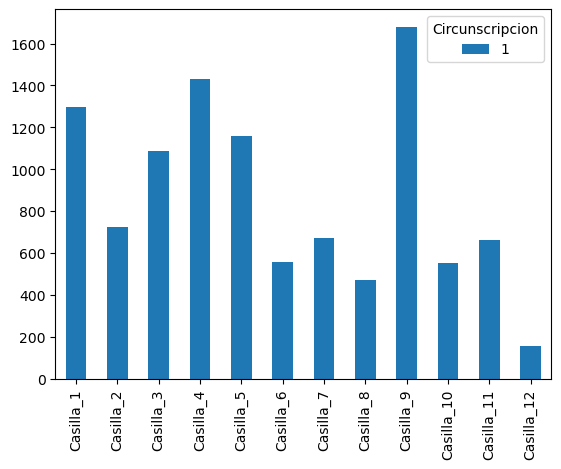

In [58]:
filter = (results.loc[:,"Circunscripcion"] == 1) & (results.loc[:, "siglas"] == "FP")
selected_colums = ["Circunscripcion"] + [ f"Casilla_{x}" for x in range(1,13)]
sum_results = results.loc[filter, selected_colums].groupby("Circunscripcion", group_keys=False).sum()
sum_results.transpose().plot(kind="bar")

<Axes: ylabel='Recinto'>

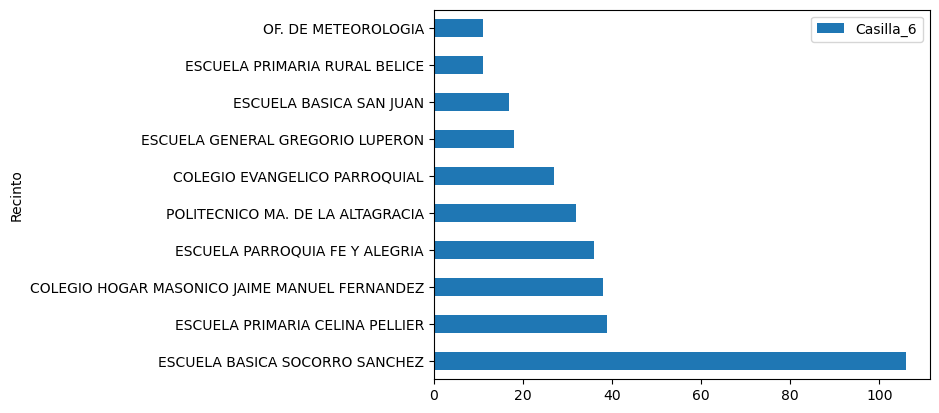

In [64]:
filter = (results.loc[:,"Circunscripcion"] == 1) & (results.loc[:, "siglas"] == "FP")
selected_colums = ["Recinto", "Casilla_6"]
results_rencinto = results.loc[filter, selected_colums].groupby("Recinto").sum()
results_rencinto.sort_values("Casilla_6", ascending=False).head(10).plot(kind="barh")

<Axes: ylabel='letra'>

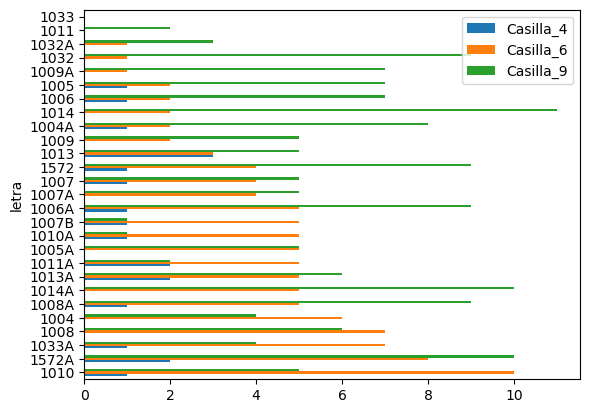

In [72]:
filter = (results.loc[:,"Recinto"] == "ESCUELA BASICA SOCORRO SANCHEZ") & (results.loc[:, "siglas"] == "FP")
selected_colums = ["letra", "Casilla_4","Casilla_6", "Casilla_9"]
results_socorro = results.loc[filter, selected_colums].set_index("letra")
results_socorro.sort_values("Casilla_6", ascending=False).plot(kind="barh")